In [3]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [4]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master2/p5_master.csv'
data5 = pd.read_csv(file)

/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master2/p7_master.csv'
data7 = pd.read_csv(file)

/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (37,38,39,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master2/p9_master.csv'
data9 = pd.read_csv(file)

/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master2/p11_master.csv'
data11 = pd.read_csv(file)

/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master2/p12_master.csv'
data12 = pd.read_csv(file)

In [9]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master2/p17_master.csv'
data17 = pd.read_csv(file)

/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master2/p18_master.csv'
data18 = pd.read_csv(file)

In [11]:
data = [data5, data7, data9, data11, data12, data17, data18]
all_data = pd.concat(data, ignore_index=True, sort=True)
data.append(all_data)
part = [5, 7, 9, 11, 12, 17, 18]

In [11]:
data[0].columns

Index(['a_harmonicity', 'a_intensity', 'a_mfcc_0', 'a_mfcc_1',
       'a_pitch_frequency', 'a_pitch_strength', 'engagement', 'of_AU01_c',
       'of_AU02_c', 'of_AU04_c', 'of_AU05_c', 'of_AU06_c', 'of_AU07_c',
       'of_AU09_c', 'of_AU10_c', 'of_AU12_c', 'of_AU14_c', 'of_AU15_c',
       'of_AU17_c', 'of_AU20_c', 'of_AU23_c', 'of_AU25_c', 'of_AU26_c',
       'of_AU28_c', 'of_AU45_c', 'of_confidence', 'of_gaze_0_x', 'of_gaze_0_y',
       'of_gaze_0_z', 'of_gaze_1_x', 'of_gaze_1_y', 'of_gaze_1_z',
       'of_gaze_angle_x', 'of_gaze_angle_y', 'of_gaze_distance',
       'of_gaze_distance_x', 'of_gaze_distance_y', 'of_pose_Rx', 'of_pose_Ry',
       'of_pose_Rz', 'of_pose_Tx', 'of_pose_Ty', 'of_pose_Tz',
       'of_pose_distance', 'of_success', 'op_num_people', 'participant',
       'ros_GAME_STATE', 'ros_PARTICIPANT_STATE', 'ros_ROBOT_STATE',
       'ros_activity', 'ros_aptitude', 'ros_diff_1', 'ros_diff_2',
       'ros_diff_3', 'ros_diff_4', 'ros_diff_5', 'ros_difficulty',
       'ros_game

In [13]:
def binary_feature_splits(feature):
    en_pos = []
    en_neg = []

    for i,d in enumerate(data):
        d_pos = d.loc[d[feature] == 1]
        d_neg = d.loc[d[feature] == 0]

        counts_pos = d_pos['engagement'].value_counts()
        counts_neg = d_neg['engagement'].value_counts()

        en_pos.append(((counts_pos[1]/len(d_pos))*100))
        en_neg.append(((counts_neg[1]/len(d_neg))*100))
    
    print('Positive')
    for p in range(0, len(part)):
        i = en_pos[p]
        print(part[p], round(i,3), end='%\n')
    print('Average', round((np.mean(en_pos[0:len(part)])), 3), end='%\n')
    print('Total', round(en_pos[-1], 3), end='%\n')
    
    print()
    
    print('Negative')
    for p in range(0, len(part)):
        i = en_neg[p]
        print(part[p], round(i,3), end='%\n')
    print('Average', round((np.mean(en_neg[0:len(part)])), 3), end='%\n')
    print('Total', round(en_neg[-1], 3), end='%\n')

    return en_pos[:-1], en_neg[:-1]


In [12]:
x = binary_feature_splits('of_success')

Positive
5 89.902%
7 73.172%
9 77.92%
11 80.233%
12 80.083%
17 56.998%
18 81.067%
Average 77.053%
Total 77.781%

Negative
5 58.533%
7 41.807%
9 26.857%
11 50.284%
12 31.975%
17 21.19%
18 62.93%
Average 41.94%
Total 37.969%


In [16]:
check = ['of_AU01_c',
       'of_AU02_c', 'of_AU04_c', 'of_AU05_c', 'of_AU06_c', 'of_AU07_c',
       'of_AU09_c', 'of_AU10_c', 'of_AU12_c', 'of_AU14_c', 'of_AU15_c',
       'of_AU17_c', 'of_AU20_c', 'of_AU23_c', 'of_AU25_c', 'of_AU26_c',
       'of_AU28_c', 'of_AU45_c']
for i in check:
    print(i)
    x = binary_feature_splits(i)
    print()

of_AU01_c
Positive
5 85.636%
7 76.508%
9 72.395%
11 66.754%
12 66.233%
17 37.476%
18 74.416%
Average 68.488%
Total 74.416%

Negative
5 83.711%
7 54.721%
9 44.29%
11 82.93%
12 63.795%
17 53.858%
18 78.009%
Average 65.902%
Total 78.009%

of_AU02_c
Positive
5 88.445%
7 78.39%
9 80.736%
11 76.535%
12 72.488%
17 56.219%
18 80.85%
Average 76.238%
Total 80.85%

Negative
5 81.402%
7 52.772%
9 42.197%
11 76.645%
12 61.09%
17 44.86%
18 75.188%
Average 62.022%
Total 75.188%

of_AU04_c
Positive
5 88.943%
7 81.435%
9 73.352%
11 82.519%
12 77.31%
17 62.83%
18 77.345%
Average 77.676%
Total 77.345%

Negative
5 81.393%
7 52.095%
9 41.542%
11 71.178%
12 56.148%
17 36.531%
18 76.461%
Average 59.335%
Total 76.461%

of_AU05_c
Positive
5 85.012%
7 48.318%
9 69.664%
11 72.763%
12 84.65%
17 28.651%
18 62.584%
Average 64.52%
Total 62.584%

Negative
5 84.208%
7 62.009%
9 47.719%
11 76.864%
12 60.899%
17 50.117%
18 78.096%
Average 65.702%
Total 78.096%

of_AU06_c
Positive
5 90.779%
7 85.585%
9 73.188%
11 79.404%

In [15]:
diff = []

for i in all_data.columns:
    if 'diff_' in i:
        print(i)
        x = binary_feature_splits(i)
        
        diff.append(x[0])
        print()

ros_diff_1
Positive
5 82.422%
7 90.997%
9 55.136%
11 77.095%
12 73.611%
17 52.931%
18 76.252%
Average 72.635%
Total 66.509%

Negative
5 84.545%
7 59.103%
9 46.991%
11 76.542%
12 63.507%
17 46.804%
18 76.856%
Average 64.907%
Total 65.233%

ros_diff_2
Positive
5 90.067%
7 64.127%
9 52.841%
11 85.154%
12 86.651%
17 47.316%
18 87.126%
Average 73.326%
Total 73.637%

Negative
5 82.451%
7 58.995%
9 48.434%
11 75.625%
12 61.739%
17 47.972%
18 74.89%
Average 64.301%
Total 63.999%

ros_diff_3
Positive
5 79.506%
7 48.053%
9 47.697%
11 75.179%
12 55.615%
17 64.501%
18 65.695%
Average 62.321%
Total 60.624%

Negative
5 86.228%
7 64.195%
9 49.534%
11 77.035%
12 69.218%
17 42.923%
18 77.969%
Average 66.729%
Total 66.903%

ros_diff_4
Positive
5 83.203%
7 55.508%
9 36.378%
11 79.23%
12 65.707%
17 49.706%
18 68.047%
Average 62.54%
Total 62.345%

Negative
5 84.783%
7 61.925%
9 52.491%
11 76.139%
12 64.006%
17 47.687%
18 80.469%
Average 66.786%
Total 66.358%

ros_diff_5
Positive
5 98.411%
7 75.55%
9 57.652

In [74]:
for i in all_data.columns:
    if 'skill_' in i:
        print(i)
        x = binary_feature_splits(i)
        print()

ros_skill_EM
Positive
5 87.895%
7 54.058%
9 78.243%
11 78.643%
12 40.941%
17 54.83%
18 76.012%
Average 67.232%
Total 65.938%

Negative
5 84.133%
7 60.065%
9 47.893%
11 76.526%
12 66.48%
17 47.568%
18 76.823%
Average 65.641%
Total 65.374%

ros_skill_NC
Positive
5 84.461%
7 59.094%
9 53.694%
11 78.167%
12 63.095%
17 49.527%
18 83.19%
Average 67.318%
Total 67.349%

Negative
5 84.185%
7 60.337%
9 45.545%
11 75.438%
12 65.62%
17 46.62%
18 72.651%
Average 64.342%
Total 63.914%

ros_skill_OS
Positive
5 83.338%
7 60.519%
9 42.728%
11 75.941%
12 70.992%
17 46.266%
18 73.677%
Average 64.78%
Total 63.741%

Negative
5 85.002%
7 59.071%
9 55.292%
11 77.216%
12 59.575%
17 49.448%
18 79.644%
Average 66.464%
Total 66.9%



In [13]:
def threshold_feature_splits(feature, threshold):
    en_pos = []
    en_neg = []

    for i,d in enumerate(data):
        d_pos = d.loc[d[feature] <= threshold]
        d_neg = d.loc[d[feature] > threshold]

        counts_pos = d_pos['engagement'].value_counts()
        counts_neg = d_neg['engagement'].value_counts()

        en_pos.append(((counts_pos[1]/len(d_pos))*100))
        en_neg.append(((counts_neg[1]/len(d_neg))*100))
    
    print('Less Than or Equal To')
    for p in range(0, len(part)):
        i = en_pos[p]
        print(part[p], round(i,3), end='%\n')
    print('Average', round((np.mean(en_pos[0:len(part)])), 3), end='%\n')
    print('Total', round(en_pos[-1], 3), end='%\n')
    
    print()
    
    print('Greater Than')
    for p in range(0, len(part)):
        i = en_neg[p]
        print(part[p], round(i,3), end='%\n')
    print('Average', round((np.mean(en_neg[0:len(part)])), 3), end='%\n')
    print('Total', round(en_neg[-1], 3), end='%\n')

    return en_pos[:-1], en_neg[:-1]


In [72]:
threshold_feature_splits('ros_ts_robot_talked', 60)

Less Than or Equal To
5 84.904%
7 70.56%
9 60.121%
11 75.159%
12 67.256%
17 45.576%
18 78.799%
Average 68.91%
Total 69.635%

Greater Than
5 79.839%
7 26.598%
9 25.104%
11 84.53%
12 35.249%
17 72.22%
18 34.537%
Average 51.154%
Total 43.496%


([84.90377056340078,
  70.55985275105726,
  60.120603972225595,
  75.15867902283881,
  67.25563997662186,
  45.57550652448035,
  78.79879036133889],
 [79.83892617449665,
  26.597862744301327,
  25.103724680358635,
  84.53006639857851,
  35.24938271604938,
  72.2198908938313,
  34.53715876575671])

# Time Since Analysis

In [16]:
def over_time(feature):
    increase = 10 
    start = increase*-1
    
    end = 60*9.5
    
    answer = []
    index = []
    while (start+increase <= end):
        index.append(start+increase)
        curr = all_data.loc[(all_data[feature]>start) & (all_data[feature]<=(start+increase))]
        counts = curr['engagement'].value_counts()
        
        if 1 in counts:
            answer.append(((counts[1]/len(curr))*100))
        else:
            answer.append(0)
        
        start += increase
    return index, answer

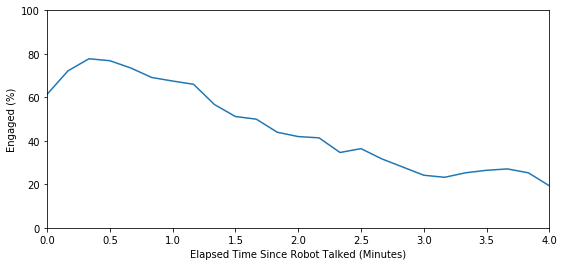

In [22]:
# Time Since
plt.rcParams["figure.figsize"] = [9,4]
fig, ax = plt.subplots()

#over_time_vars = ['ros_ts_game_start', 'ros_ts_robot_talked']
over_time_vars = ['ros_ts_robot_talked']

labels = {
    'ros_ts_game_start': 'After Game Starts',
    'ros_ts_robot_talked': 'After Robot Talks'
}

for v in over_time_vars:
    index, curr = over_time(v)
    index = [x / 60 for x in index]
    #plt.plot(index, curr, label=labels[v])
    plt.plot(index, curr)

#plt.legend(loc='best')

plt.tick_params(axis='both', which='major')
#plt.xlabel('Elapsed Time (Minutes)')
plt.xlabel('Elapsed Time Since Robot Talked (Minutes)')
plt.ylabel('Engaged (%)')
#plt.title('Engagement After Robot Talks')

plt.ylim(0, 100)
plt.xlim(0, 4)
#plt.legend()

plt.show()
fig.savefig('figure.eps', format='eps', dpi=1000)

In [118]:
def over_time_part(feature, curr_data):
    increase = 60*5 
    start = increase*-1
    
    end = 3600
    
    answer = []
    index = []
    while (start+increase <= end):
        index.append(start+increase)
        curr = curr_data.loc[(curr_data[feature]>start) & (curr_data[feature]<=(start+increase))]
        counts = curr['engagement'].value_counts()
        
        if 1 in counts:
            answer.append(((counts[1]/len(curr))*100))
        else:
            answer.append(0)
        
        start += increase
    return index, answer

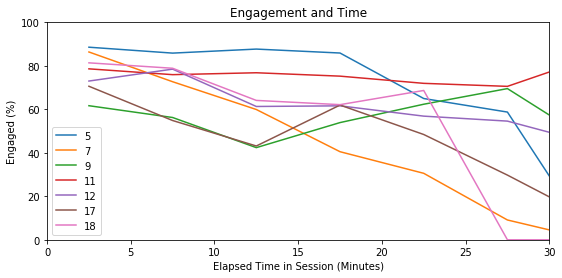

In [129]:
# Time Since
plt.rcParams["figure.figsize"] = [9,4]
fig, ax = plt.subplots()

for i,d in enumerate(data):
    if i == len(data)-1:
        break
    index, curr = over_time_part('timestamp', d)
    index = [x / 60 for x in index]
    index = index[1:]
    index = [x - 2.5 for x in index]
    curr = curr[1:]
    plt.plot(index, curr, label=str(part[i]))

plt.tick_params(axis='both', which='major')
plt.xlabel('Elapsed Time in Session (Minutes)')
plt.ylabel('Engaged (%)')
plt.title('Engagement and Time')

plt.xlim(0, 30)
plt.ylim(0, 100)
plt.legend()

plt.show()
fig.savefig('figure.eps', format='eps', dpi=1000)

# Open Face Analysis

In [73]:
def over_feature(feature):
    answer = []
    for i in range(0, 100, 5):
        t1 = np.nanpercentile(all_data[feature], i)
        t2 = np.nanpercentile(all_data[feature], i+5)
        
        curr = all_data.loc[(all_data[feature]>=t1) & (all_data[feature]<=t2)]
        counts = curr['engagement'].value_counts()
        
        if 1 in counts:
            answer.append(((counts[1]/len(curr))*100))
        else:
            answer.append(0)
            
    return answer

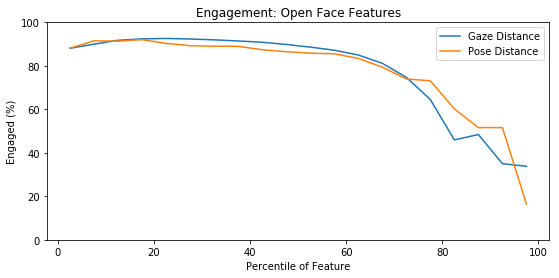

In [114]:
# Percentile Features
plt.rcParams["figure.figsize"] = [9,4]
fig, ax = plt.subplots()

percentile_vars = ['of_gaze_distance', 'of_pose_distance']

labels = {
    'of_gaze_distance': 'Gaze Distance',
    'of_pose_distance': 'Pose Distance',
}

index = range(0,100,5)
index = [x + 2.5 for x in index]

for v in percentile_vars:
    curr = over_feature(v)
    plt.plot(index, curr, label=labels[v])

plt.legend(loc='lower center')

plt.tick_params(axis='both', which='major')
plt.ylim(0, 100)
plt.legend()

plt.xlabel('Percentile of Feature')
plt.ylabel('Engaged (%)')
plt.title('Engagement: Open Face Features')

plt.show()
fig.savefig('figure.eps', format='eps', dpi=1000)

# Converged Difficulty

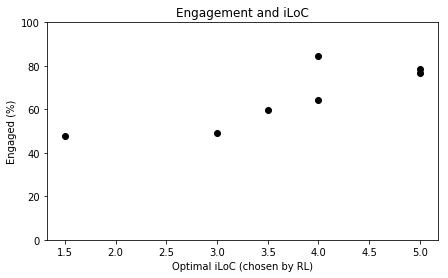

In [45]:
# Percentile Features
plt.rcParams["figure.figsize"] = [7,4]
fig, ax = plt.subplots()

plt.plot(5, 78.779, 'o', color='k')
plt.plot(1.5, 47.891, 'o', color='k')
plt.plot(4, 64.487, 'o', color='k')
plt.plot(5, 76.610, 'o', color='k')
plt.plot(3, 49.086, 'o', color='k')
plt.plot(3.5, 59.813, 'o', color='k')
plt.plot(4, 84.320, 'o', color='k')

plt.ylim(0, 100)

plt.xlabel('Optimal iLoC (chosen by RL)')
plt.ylabel('Engaged (%)')
plt.title('Engagement and iLoC')

plt.show()
fig.savefig('figure.eps', format='eps', dpi=1000)

In [24]:
types = data[0]['ros_activity'].unique()
types = sorted(list(types))

for t in types:
    print(t)
    record = []
    for i,d in enumerate(data):
        if i == len(data)-1:
            continue
        temp = d.loc[d['ros_activity']==t]
        r = ((temp['engagement'].sum())/len(temp))*100
        print(part[i], r)
        record.append(r)
    print()
    print(np.mean(record))
    print()

10.0
5 87.17199814557254
7 79.78657353511835
9 43.204452255418865
11 75.59109438695516
12 59.91942324003393
17 37.90960451977401
18 69.49709060681629

64.72574809852702

nan
5 nan
7 nan
9 nan
11 nan
12 nan
17 nan
18 nan

nan

1.0
5 95.99067599067598
7 56.76728334956182
9 47.88226299694189
11 71.44546147978642
12 53.89487870619946
17 45.70559610705596
18 79.41616766467065

64.44318947069888

3.0
5 70.56580565805658
7 63.55115511551155


/anaconda3/envs/caispp/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in long_scalars


9 60.25186327422256
11 77.81862745098039
12 70.93150684931507
17 25.166970248937464
18 71.62573099415205

62.844522798739376

4.0
5 90.84925690021231
7 55.502307419240324
9 42.81496062992126
11 74.05377980720446
12 50.49422799422799
17 36.75977653631285
18 81.87309865275967

61.763915419982695

5.0
5 89.5926477893691
7 59.87562189054726
9 44.42786069651741
11 80.813097866078
12 83.52405721716515
17 70.3373015873016
18 91.45958986731002

74.2900252734698

6.0
5 65.68281938325991
7 62.06742346061232
9 65.52229497973184
11 85.98114824335904
12 62.95346628679962
17 46.72636815920398
18 86.95886197616302

67.98462606987566

7.0
5 90.56445461479787
7 73.0706287683032
9 41.30356822664515
11 74.21141506247889
12 77.15818622360679
17 48.033033033033036
18 81.09626584446728

69.34822168190459

8.0
5 76.66332999666334
7 67.41489469591968
9 37.2241445597847
11 78.78000284050562
12 68.78040762656147
17 26.482188295165393
18 67.0595382746051

60.3435008984579

9.0
5 84.86504723346829
7 47.4865326501

In [20]:
types

[10.0, nan, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 16.0]

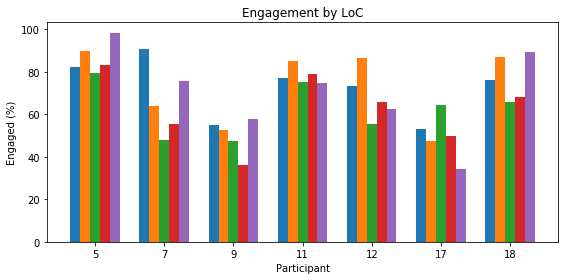

In [46]:
# Difficulty Graph

plt.rcParams["figure.figsize"] = [8,4]

fig, ax = plt.subplots()

index = np.arange(7)
bar_width = 1/7

rects1 = ax.bar(index, diff[0], bar_width, label='Level 1')
rects2 = ax.bar(index+bar_width, diff[1], bar_width, label='Level 2')
rects3 = ax.bar(index+bar_width*2, diff[2], bar_width, label='Level 3')
rects4 = ax.bar(index+bar_width*3, diff[3], bar_width, label='Level 4')
rects5 = ax.bar(index+bar_width*4, diff[4], bar_width, label='Level 5')


ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement by LoC')

ax.set_xticks(index + bar_width*2)
ax.set_xticklabels(('5', '7', '9', '11', '12', '17', '18'))
#ax.legend()
fig.tight_layout()

plt.show()
fig.savefig('figure.eps', format='eps', dpi=1000)

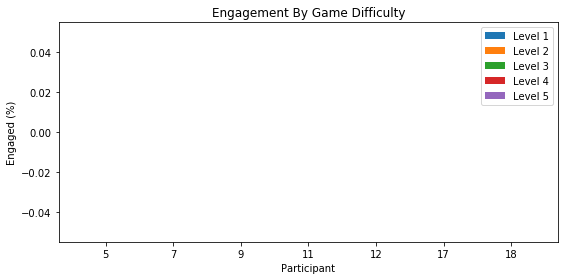

In [30]:
# Difficulty Graph


plt.rcParams["figure.figsize"] = [8,4]

fig, ax = plt.subplots()

index = np.arange(7)
bar_width = 1/7

rects1 = ax.bar(index, [0,0,0,0,0,0,0], bar_width, label='Level 1')
rects2 = ax.bar(index+bar_width, [0,0,0,0,0,0,0], bar_width, label='Level 2')
rects3 = ax.bar(index+bar_width*2, [0,0,0,0,0,0,0], bar_width, label='Level 3')
rects4 = ax.bar(index+bar_width*3, [0,0,0,0,0,0,0], bar_width, label='Level 4')
rects5 = ax.bar(index+bar_width*4, [0,0,0,0,0,0,0], bar_width, label='Level 5')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement By Game Difficulty')

ax.set_xticks(index + bar_width*2)
ax.set_xticklabels(('5', '7', '9', '11', '12', '17', '18'))
ax.legend()
fig.tight_layout()

plt.show()
fig.savefig('figure2.eps', format='eps', dpi=1000)